# Insurance Price Prediction

# 1. Introduction

In this part of the program, this part focuses on giving the readers introduction towards this program that is currently built

Author : Muhammad Daffa Al Rasyid

Dataset: Insurance.csv

Objective: This Program is designed so that the user can predict the cost of insurance based of the health of its user

# 2. Import Libraries

This section focuses on downloading the libraries that are going to be used in this process

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
# Import sklearn
import sklearn

#Import train_test_split
from sklearn.model_selection import train_test_split

#Import the standard scaler
from sklearn.preprocessing import StandardScaler

#Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# import library
from sklearn.linear_model import LinearRegression

#Import MAE and R2 score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Import pickle and json
import pickle


# 3. Data Loading

This part of the program focuses on loading the database that are going to be used in this prgram

In [2]:
#Load dataset
df_ori = pd.read_csv('insurance.csv')

#Duplicate data set
df = df_ori.copy()

#Show All column
pd.set_option('display.max_columns', None)

#Show data set
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Display database info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Based on the information above, the data frame itself contais 1338 entries and 6 columns

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Based off the information given above, there are no missing value in this database therefore we can continue towards the next step which is EDA(Exploratory Data Analysis)

# 3. Exploratory Data Anlysis(EDA)

Firstly, it is essential for the user in order to ake differentiation to determine the weight class of the user based on their BMI therefore we must find the distribution of the data first

Text(0.5, 1.0, 'Histogram of BMI')

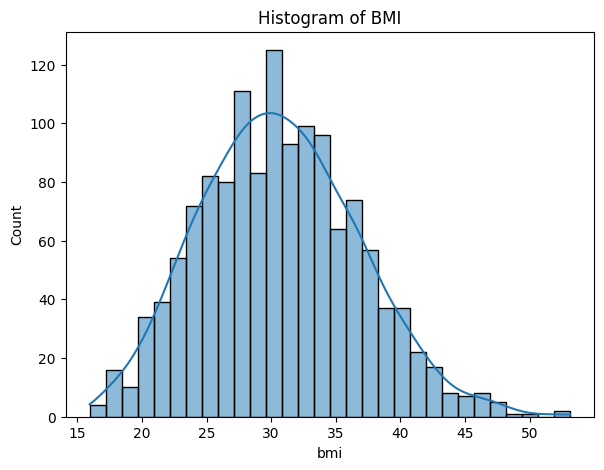

In [5]:
# HIstogram of the column BMI
plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
sns.histplot(df.bmi, kde=True, bins=30)
plt.title('Histogram of BMI')

The classification of the BMI for the overweight class itself can be divided into three  :

1. Overweight class 1: 30 ≤ BMI < 35
2. Overweight class 2: 35 ≤ BMI < 40
3. Overweight class 3: 40 < BMI

Based off the distribution above, it can be concluded that the most entries for the categories of overweight is on the overweight class 1, followed by overweight class 2, and overweight class 3

The next step is to find the correlation between the user's BMI, whether the user smokes and the price of their inssurance therefore we can use a scatterplot in order to find the correlation

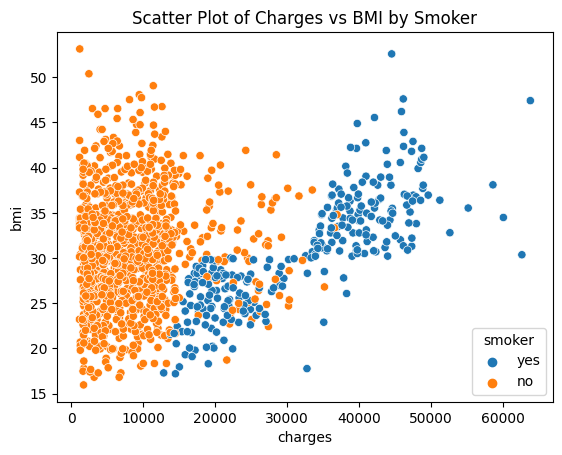

In [6]:
# Displaying scatter plot between charges, bmi and smoker
sns.scatterplot(x="charges", y="bmi", hue="smoker", data=df)
plt.title("Scatter Plot of Charges vs BMI by Smoker")
plt.show()

Based on the scatterplot, it can be seen that the charges are affected by the user BMI and whether or not the user smokes as most of the non smoker despite their high BMI have more cheaper insurance charges when being compared with the user who smokes even though they have lower BMI 

Now we are going to find the correlation of the rest of the variables with the column charges of insurance

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.phik_matrix()


interval columns not set, guessing: ['age', 'bmi', 'children', 'charges']


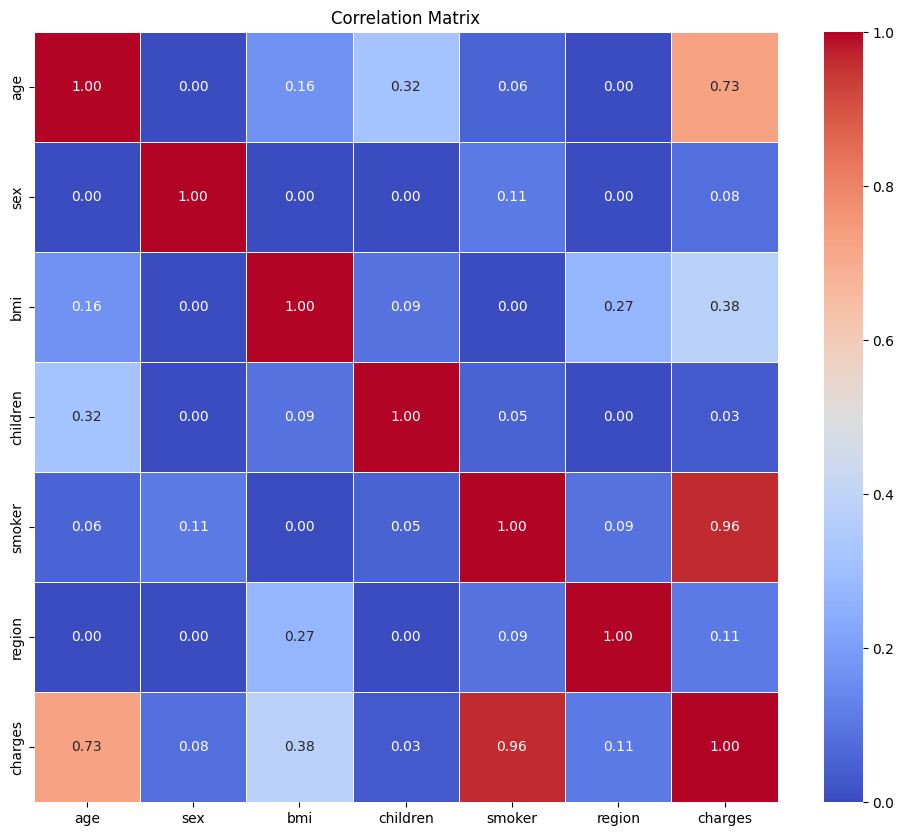

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Based off the data given above,the top three highest correlation score can be found in the age, smoker, and BMI variable

One of the main factor that drives up the prices is the BMI and Smoker, so let's make a visualization to prove these findings

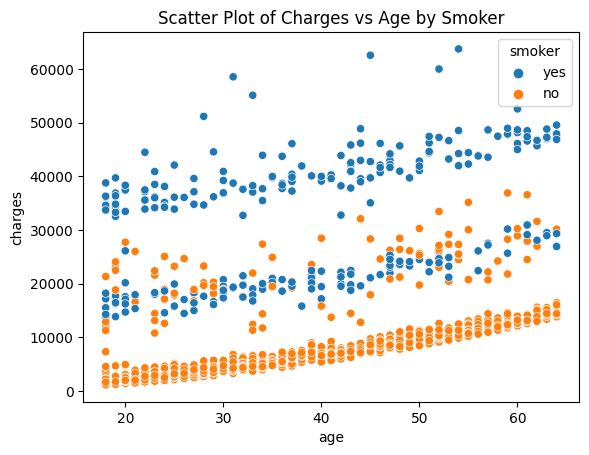

In [9]:
# Displaying scatter plot between charges, bmi and smoker
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Scatter Plot of Charges vs Age by Smoker")
plt.show()

This result gives indication that smoker have more effect to insurance charges than age itself

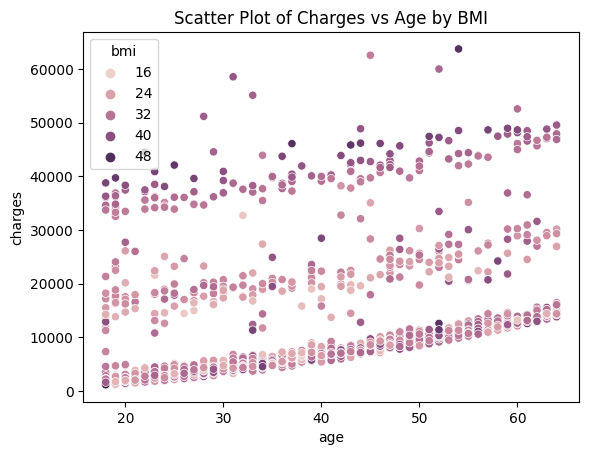

In [10]:
# Displaying scatter plot between charges, bmi and smoker
sns.scatterplot(x="age", y="charges", hue="bmi", data=df)
plt.title("Scatter Plot of Charges vs Age by BMI")
plt.show()

This resulf also gives indication that the BMI gives more corelation than age

We have finished with the Exploratory data analysis section and therefore we can move foward to the feature engineering section

# 4. Feature Engineering

This part of the program focuses on the preprocessing of the data in order to be able to be put on model training

# Split features (X) and (y)

The first step is to split the dataset itself between the variables (X) and the target(y)

In [11]:
# Split X dan y
X = df.drop('charges', axis=1)
y = df.charges

X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


After we split the features we split it further with a test set and a train set

# Split Train and Test Set

In [12]:
#Split using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

print('Train size', X_train.shape)
print('test size', X_test.shape)
X_train.head()

Train size (1070, 6)
test size (268, 6)


,age,sex,bmi,children,smoker,region
67,40,male,26.315,1,no,northwest
736,37,female,38.390,0,yes,southeast
310,50,male,26.600,0,no,southwest
963,46,male,24.795,3,no,northeast
680,21,female,17.400,1,no,southwest


Above result shows that for this moment, we split the data test for train of about 80% of the data while the Test set about 20% of the data.

The next step is to split it's categorical column and numerical column

# Split categorical column and numerical column

In [13]:
# Splitting category column and numerical column
num_col = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col = X_train.select_dtypes(include='object').columns.tolist()

#Menunjukan num_col and cat_col
print('Numerical columns:', num_col)
print('Categorical columns:', cat_col)

Numerical columns: ['age', 'bmi', 'children']
Categorical columns: ['sex', 'smoker', 'region']


Since smoker can be considered an ordinal category while the rest are nominal category therefore we must split the smoker from the rest of the column And since based of previous visualization from the scatterplot, the sex and region column doesn't seem to put in much factor therefore we decide to drop the column

In [14]:
cat_col = ['smoker']

In [15]:
#MSplitting the database for train and test based on the column type(category/numeric)

X_train_num = X_train[num_col]
X_train_cat = X_train[cat_col]

X_test_num = X_test[num_col]
X_test_cat = X_test[cat_col]

X_train_num.head()

,age,bmi,children
67,40,26.315,1
736,37,38.390,0
310,50,26.600,0
963,46,24.795,3
680,21,17.400,1


After we split the data base, we scale the numerical column and encode the categorical column

# Feature scaling

On this part, we focuses on scaling the category that contains numerical value

In [16]:
# central tendency of X train set
X_train_num.describe()

,age,bmi,children
count,1070.000000,1070.000000,1070.000000
mean,39.124299,30.645379,1.082243
std,14.114475,6.020488,1.221404
min,18.000000,15.960000,0.000000
25%,26.000000,26.410000,0.000000
50%,39.000000,30.302500,1.000000
75%,51.000000,34.560000,2.000000
max,64.000000,53.130000,5.000000


Based on the data above, for the age have an average of 39 years old with minimum of 18 and maximum of 64 years old meanwhile the BMI have a mean of 30 with minimum of 15 and maximum of 53. On the other hand the children column have an average of 1 with minimum of 0 and a maximum of 5 this shows that the data might be skewed in terms of their distribution

In [17]:
#Show the skewness of data
X_train_num.skew()

age         0.055749
bmi         0.287205
children    1.009116
dtype: float64

As we thought, the data for children here is moderately skewed and previous analysis shows little to no corellation in terms of charges so therfore we decide to remove the children column

In [18]:
# Removing the children column
X_train_num.drop(['children'], axis = 1)
X_test_num.drop(['children'], axis = 1)

,age,bmi
650,49,42.680
319,32,37.335
314,27,31.400
150,35,24.130
336,60,25.740
...,...,...
873,43,30.100
746,34,27.000
275,47,26.600
186,26,29.920


Since the data distribution is normal, we decide to use the standard scaler for this process

In [19]:

#Define the scaler
scaler = StandardScaler()
scaler.fit(X_train_num)

#Scale the dataset
X_train_num_scaled =  scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[ 0.06207177, -0.71961   , -0.06736631],
       [-0.15057538,  1.28697921, -0.8864794 ],
       [ 0.77089561, -0.67224951, -0.8864794 ],
       ...,
       [-1.42645829, -0.37313062, -0.06736631],
       [-1.49734067, -1.25636223, -0.8864794 ],
       [ 0.98354276,  1.03272816,  1.57085987]])

After we finish in this section, we continue on towards the encode of the categorical column

# Feature Encoding

In [20]:
# check dataset
X_train_cat

,smoker
67,no
736,yes
310,no
963,no
680,no
...,...
1238,no
1147,no
106,no
1041,no


Now we encode the smoker column in this case we use an ordinal encoder since the value of yes and no are of different value therfore we use the ordinal encoder

In [21]:
# Encode using ordinalEncodeer

encoder = OrdinalEncoder(categories=[['no','yes']])
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

After we finish feature engineer the data, we now must split all the database into one database again between the numerical column and the categorical column

# Concat Database

In [22]:
# Concat column
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[ 0.06207177, -0.71961   , -0.06736631,  0.        ],
       [-0.15057538,  1.28697921, -0.8864794 ,  1.        ],
       [ 0.77089561, -0.67224951, -0.8864794 ,  0.        ],
       ...,
       [-1.42645829, -0.37313062, -0.06736631,  0.        ],
       [-1.49734067, -1.25636223, -0.8864794 ,  0.        ],
       [ 0.98354276,  1.03272816,  1.57085987,  1.        ]])

Now that we have combine the database now we go the next step which is the model definiton

# 6. Model Definition

This part focuses on defining the model or algorhytim used as well as the hyper parameter used for testing the model success and error rate

For the regression method we uses a linear regression method because the relationship between the remaining variable seems to be a linear relationship while for the hyper parameter we uses a MAE or mean absolute error rate as the data seems to be normally distributed as well as uses r2 score for the hyper parameter

In [23]:
#Define model
model_lin = LinearRegression()

# 7. Model Training

This part of the program focuses on the training of the model in order to be able to predict and complete our objectives

In [24]:
#Train the model

model_lin.fit(X_train_final, y_train)

LinearRegression()

# 8. Model Evaluation

This part of the program focuses on the evaluation of the model that we built

In [25]:
#Prediction Train set and Test Set
y_pred_train = model_lin.predict(X_train_final)
y_pred_test = model_lin.predict(X_test_final)

y_pred_train

array([ 7268.33728163, 33466.43033483,  9486.11066312, ...,
        2555.95873788,   115.66210832, 38408.97937534])

In [26]:
#Model evaluation using MAE and R2 score

print('Error-Train-Set:', mean_absolute_error(y_train, y_pred_train))
print('Error-Test-Set:', mean_absolute_error(y_test, y_pred_test))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))

Error-Train-Set: 4268.440552329293
Error-Test-Set: 4074.8228873944954

R2 Score - Train Set :  0.7363720991582905
R2 Score - Test Set  :  0.7990365248157327


In [27]:
#Display central tendencies for charges
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

From these results it can be found that for the mean absolute error, the data prediction of error lies around the 4268 range for the train set while 4074 range for the test set this means that the difference in the actual data and the predicted data lies in the 4000 range below or above the actual data. 

While the R2 score explained that for the train set, the  model predicts about 73% of the relationship while the test set predicts about 79% of the relationship

The model of this data can be describe as good fit, as the MAE shows the number of 4098 on the test set while the average of the charges itself is around 13270, and the first quartile is around 4740 this shows a relatively small number of differences in the data therefore we can move the next step of model saving and model inference

# 9. Model saving


in this part we focuses on saving the model in order to be tested with a new data

In [28]:
with open('model_lin.pkl','wb') as file_1:
  pickle.dump(model_lin, file_1)

with open('model_scaler.pkl','wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

with open('list_num_column.txt', 'wb') as file_4:
  pickle.dump(num_col, file_4)

with open('list_cat_col.txt', 'wb') as file_5:
  pickle.dump(cat_col, file_5)

# 10. Model Inference

the model inference of this program can be found in the file "Insurance_Price_Inference.ipynb"

# 11. Conclusion

To conclude, the data itself is normally distributed and the variables in this database that most affected the outcome of charges can be found in the smoker and bmi category as customer with the highest charges tend to be a smoker and have a high bmi or body mass index while the rest of the data have a small to non existent effect on the charges such as sex and region.

from the model evaluation, this model can be further improved as it is far from perfect from predicting the actual charges as the Mean absolute error rate still hovers around 4000, this is not a small number but not too big of a number as well therefore other factors needs to be considered whether or not they maters in the calculation of the insurance charges but the scatter plot proves otherwise. due to the time constraint in this project the writer would like to recommend perhaps using another type of regression model, encoder or hyper parameter could be a recipe for a better model 